<a href="https://colab.research.google.com/github/alibaqi-313/Student-Health-Analysis/blob/main/Student_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()




Saving student_health_data.xlsx to student_health_data.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('student_health_data.xlsx') # Changed to read_excel
df.head()
df.info()
df.describe()

df['Heart_Rate']

df['Age'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
 14  Family_me

,count
Age,
21,156
18,156
22,148
24,138
19,137
23,135
20,130


In [ ]:
import re

# Get columns that start with 'Unnamed:'
unnamed_columns = [col for col in df.columns if re.match(r'Unnamed: \d+', col)]

# Drop these columns from the DataFrame
df = df.drop(columns=unnamed_columns)

print("Columns after cleaning:")
df.info()
df.head()

Columns after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null 

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Family_members
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7


After uploading, the file will be available in the current directory. You can then read it using a library like pandas.

In [ ]:
import re
df[['Gender', 'Blood_Pressure_Systolic']].head()



,Gender,Blood_Pressure_Systolic
0,M,122.173015
1,F,110.778407
2,M,109.375673
3,M,125.142227
4,M,107.515592


In [ ]:
import re
df[df['Blood_Pressure_Systolic'] > 105]
df.isnull().sum()
df[df.isnull().any(axis=1)]


,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Family_members


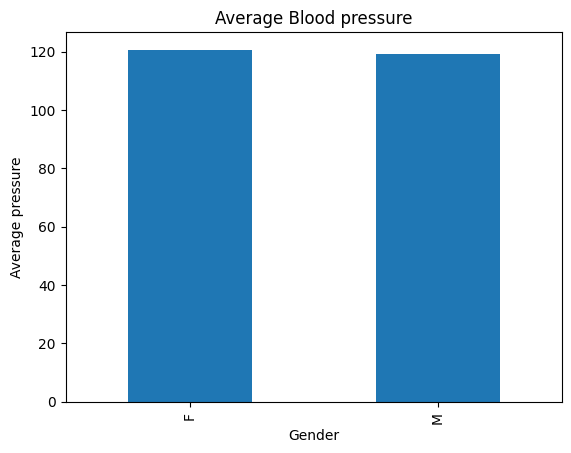

In [ ]:
df.groupby('Gender')['Blood_Pressure_Systolic'].mean().plot(kind='bar')
plt.title("Average Blood pressure")
plt.xlabel("Gender")
plt.ylabel("Average pressure")
plt.show()


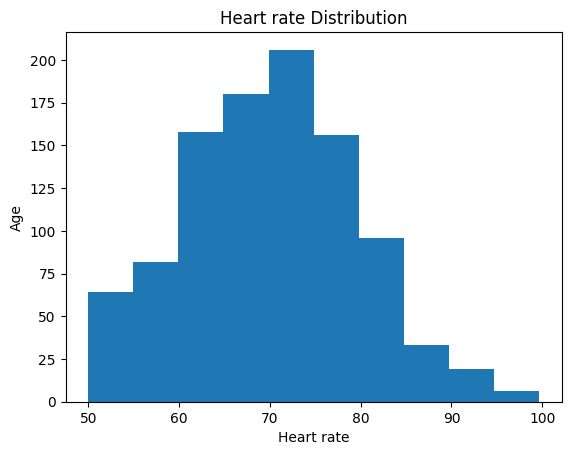

In [ ]:
df['Heart_Rate'].plot(kind='hist', bins=10)
plt.title("Heart rate Distribution")
plt.xlabel("Heart rate")
plt.ylabel("Age")
plt.show()


### 1. Average of a health metric by Gender

I will calculate and plot the average `Heart_Rate` by `Gender`. This can be considered an 'average score' (health metric) by gender, similar to how we explored 'Blood_Pressure_Systolic' earlier.

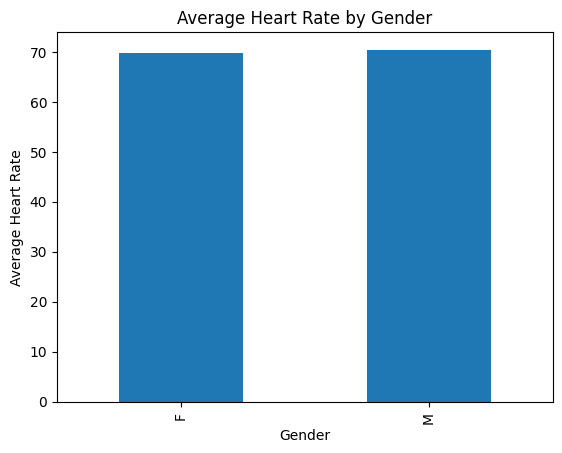

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Gender')['Heart_Rate'].mean().plot(kind='bar')
plt.title('Average Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Heart Rate')
plt.show()

### 2. Students with a health metric greater than 80

Since there isn't a generic 'score' column, I'll identify students where their `Heart_Rate` is greater than 80 as an example of 'students scoring > 80'.

In [ ]:
students_heart_rate_gt_80 = df[df['Heart_Rate'] > 80]
print(f"Number of students with Heart_Rate > 80: {len(students_heart_rate_gt_80)}")
display(students_heart_rate_gt_80.head())

Number of students with Heart_Rate > 80: 148


,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level,Family_members
6,7,22,F,93.097228,106.677782,76.499815,8.415979,1.402915,Moderate,Moderate,Happy,10.269850,23.818096,Moderate,7
8,9,19,F,81.671029,142.820977,74.676877,5.221367,5.115074,Moderate,Moderate,Neutral,37.211195,8.854986,Moderate,8
9,10,20,M,86.211086,112.635938,91.951392,8.208448,5.946601,Moderate,Moderate,Happy,33.195541,19.744741,Moderate,8
21,22,23,F,80.485309,108.828237,83.752170,4.481265,5.415522,Moderate,Moderate,Happy,26.326442,7.175118,Moderate,9
26,27,21,M,93.573764,90.609147,72.854530,9.197436,8.964341,Moderate,Moderate,Stressed,20.001047,9.941094,High,1


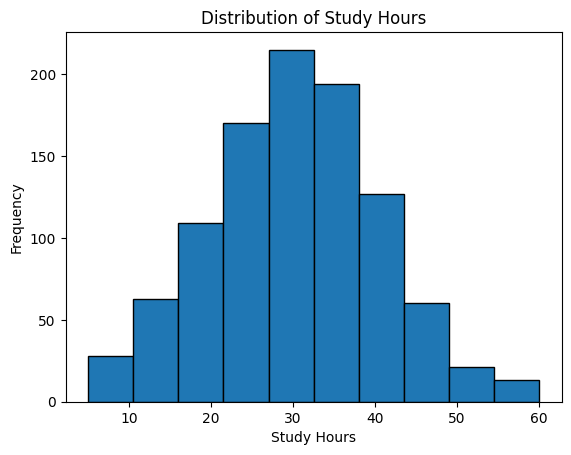

In [ ]:

df['Study_Hours'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.rename(columns={
    'Stress_Level_Biosensor': 'Stress',
    'Heart_Rate': 'HeartRate',
    'Study_Hours': 'StudyHours'
}, inplace=True)
df.head()

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   HeartRate                 1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress                    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  StudyHours                1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
 14  Family_me

,Student_ID,Age,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,StudyHours,Project_Hours,Family_members
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368,7.463000
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624,4.034465
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000,1.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503,4.000000
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873,7.000000
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167,11.000000
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325,14.000000


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
HeartRate,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Stress,0
Stress_Level_Self_Report,0
Physical_Activity,0
Sleep_Quality,0


In [ ]:
df['Gender'].value_counts()


,count
Gender,
M,519
F,481


In [ ]:
df['Health_Risk_Level'].value_counts()


,count
Health_Risk_Level,
Moderate,672
Low,190
High,138


In [ ]:
df['StudyHours'].mean()

np.float64(30.227037157383997)

In [ ]:
df['Stress'].mean()

np.float64(5.483909405205001)

In [ ]:
df['HeartRate'].mean()

np.float64(70.10186313615)

In [ ]:
df[df['Stress']>7]

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7
6,7,22,F,93.097228,106.677782,76.499815,8.415979,1.402915,Moderate,Moderate,Happy,10.269850,23.818096,Moderate,7
9,10,20,M,86.211086,112.635938,91.951392,8.208448,5.946601,Moderate,Moderate,Happy,33.195541,19.744741,Moderate,8
12,13,20,F,64.824663,138.396077,84.015606,8.953156,8.403831,Moderate,Good,Neutral,40.484849,12.992542,High,2
14,15,21,F,75.553768,137.642627,85.199991,7.154831,4.546753,High,Moderate,Neutral,39.763737,10.290925,Moderate,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,981,23,M,73.773507,115.903165,84.034689,8.774107,7.208390,Moderate,Moderate,Neutral,14.075170,18.651249,High,8
982,983,19,M,62.208483,112.107565,93.147798,7.861251,2.119108,Moderate,Moderate,Neutral,41.919312,12.134845,Moderate,2
991,992,24,F,63.471032,129.910851,68.920170,7.462613,1.114808,Moderate,Moderate,Neutral,25.092080,19.915251,Moderate,11
993,994,21,F,51.420080,132.956877,93.201842,7.589973,4.761993,Moderate,Poor,Neutral,41.475665,11.496868,Moderate,1


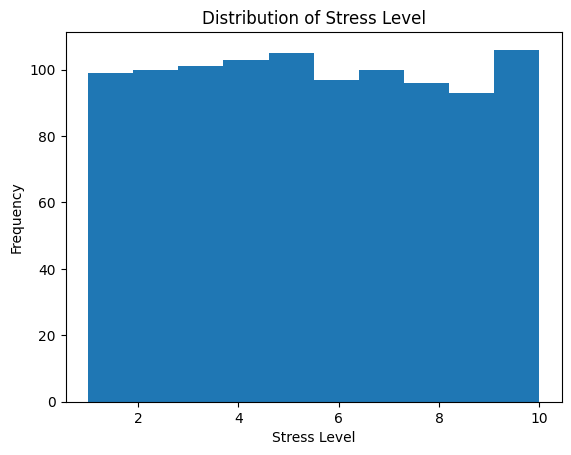

In [ ]:
df['Stress'].plot(kind='hist', bins=10)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

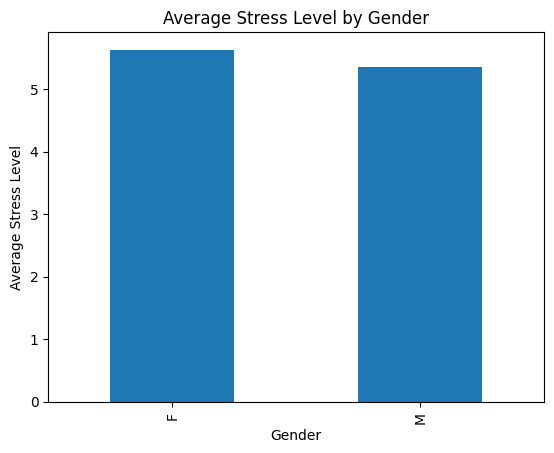

In [ ]:
df.groupby('Gender')['Stress'].mean().plot(kind='bar')
plt.title('Average Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.show()

In [ ]:
high=df[df['Health_Risk_Level']=='High']
high.head()

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
12,13,20,F,64.824663,138.396077,84.015606,8.953156,8.403831,Moderate,Good,Neutral,40.484849,12.992542,High,2
15,16,20,M,63.771295,93.990247,70.221628,1.228137,3.849422,High,Poor,Happy,39.308745,16.540637,High,4
26,27,21,M,93.573764,90.609147,72.854530,9.197436,8.964341,Moderate,Moderate,Stressed,20.001047,9.941094,High,1
37,38,21,F,57.426597,141.501336,67.860583,8.960309,8.925855,Moderate,Moderate,Neutral,26.800235,12.365520,High,14


In [ ]:
df[(df['Stress']>7)&(df['StudyHours']>25)]

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members
9,10,20,M,86.211086,112.635938,91.951392,8.208448,5.946601,Moderate,Moderate,Happy,33.195541,19.744741,Moderate,8
12,13,20,F,64.824663,138.396077,84.015606,8.953156,8.403831,Moderate,Good,Neutral,40.484849,12.992542,High,2
14,15,21,F,75.553768,137.642627,85.199991,7.154831,4.546753,High,Moderate,Neutral,39.763737,10.290925,Moderate,11
16,17,23,F,65.040310,123.100861,73.176090,7.210422,4.601397,Moderate,Good,Happy,32.930511,18.664338,Moderate,6
31,32,18,F,75.838004,132.684023,72.671071,9.334536,1.397310,Low,Moderate,Neutral,39.860839,7.197902,Moderate,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,980,24,F,97.308672,135.537379,78.658548,8.664233,1.260971,High,Good,Happy,26.187293,13.899089,Moderate,3
982,983,19,M,62.208483,112.107565,93.147798,7.861251,2.119108,Moderate,Moderate,Neutral,41.919312,12.134845,Moderate,2
991,992,24,F,63.471032,129.910851,68.920170,7.462613,1.114808,Moderate,Moderate,Neutral,25.092080,19.915251,Moderate,11
993,994,21,F,51.420080,132.956877,93.201842,7.589973,4.761993,Moderate,Poor,Neutral,41.475665,11.496868,Moderate,1


In [ ]:
df[df['Sleep_Quality'] == 'Poor']


,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7
15,16,20,M,63.771295,93.990247,70.221628,1.228137,3.849422,High,Poor,Happy,39.308745,16.540637,High,4
24,25,22,F,62.947893,160.171648,78.581984,3.681795,5.414090,Moderate,Poor,Neutral,40.859829,15.229040,Moderate,5
28,29,23,M,61.598899,132.831900,88.291298,5.354742,2.990328,Moderate,Poor,Stressed,13.191049,19.844753,Moderate,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,24,M,69.814420,114.732057,82.789918,5.662138,8.353919,High,Poor,Neutral,18.324809,10.806863,High,2
989,990,20,M,80.761463,160.270114,88.618168,1.067168,8.749079,High,Poor,Stressed,38.108637,12.299347,High,5
993,994,21,F,51.420080,132.956877,93.201842,7.589973,4.761993,Moderate,Poor,Neutral,41.475665,11.496868,Moderate,1
996,997,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High,6


In [ ]:
df[df['Sleep_Quality'] == 'Poor']['Stress'].mean()
df[df['Sleep_Quality'] == 'Good']['Stress'].mean()



np.float64(5.564756441116279)

In [ ]:
df.groupby('Physical_Activity')['Stress'].mean()


,Stress
Physical_Activity,
High,5.752426
Low,5.393345
Moderate,5.426409


In [ ]:
df.groupby('Health_Risk_Level')['HeartRate'].mean()


,HeartRate
Health_Risk_Level,
High,69.843888
Low,70.818449
Moderate,69.952234


In [ ]:
df.groupby('StudyHours')['Stress'].mean().head()


,Stress
StudyHours,
5.000000,5.612468
5.042926,1.615966
5.056460,9.621740
5.736824,9.796944
6.615718,6.198518


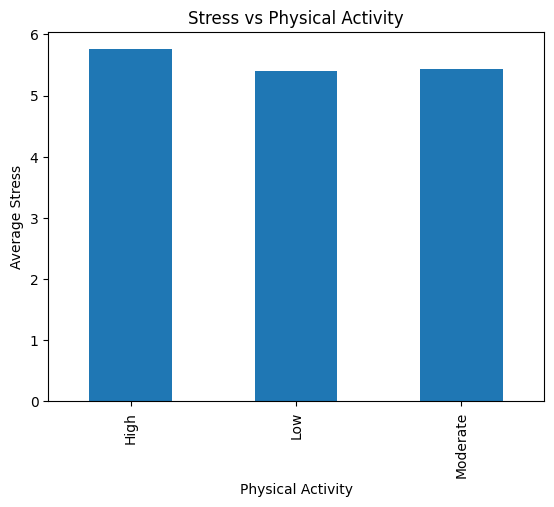

In [ ]:
df.groupby('Physical_Activity')['Stress'].mean().plot(kind='bar')
plt.title("Stress vs Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Average Stress")
plt.show()


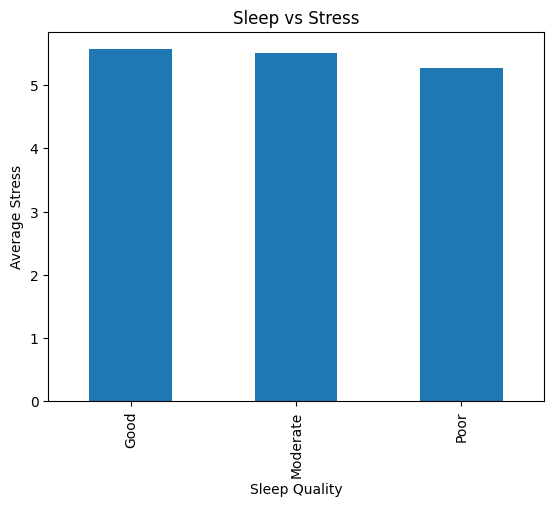

In [ ]:
df.groupby('Sleep_Quality')['Stress'].mean().plot(kind='bar')
plt.title("Sleep vs Stress")
plt.xlabel("Sleep Quality")
plt.ylabel("Average Stress")
plt.show()


In [ ]:
df.corr(numeric_only=True)


,Student_ID,Age,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,StudyHours,Project_Hours,Family_members
Student_ID,1.000000,-0.013083,-0.001600,0.020814,0.000600,-0.000791,-0.014888,0.034340,-0.020922,0.034071
Age,-0.013083,1.000000,0.021002,-0.007643,0.009554,0.036973,0.013957,-0.071895,-0.022001,0.017896
HeartRate,-0.001600,0.021002,1.000000,0.010487,-0.029246,0.045965,-0.030244,0.042154,0.002522,0.066718
Blood_Pressure_Systolic,0.020814,-0.007643,0.010487,1.000000,0.023070,-0.029756,-0.024142,-0.004735,-0.031142,0.022375
Blood_Pressure_Diastolic,0.000600,0.009554,-0.029246,0.023070,1.000000,-0.003564,-0.013975,-0.009838,-0.025889,-0.005954
Stress,-0.000791,0.036973,0.045965,-0.029756,-0.003564,1.000000,-0.025881,-0.029895,0.007518,-0.055613
Stress_Level_Self_Report,-0.014888,0.013957,-0.030244,-0.024142,-0.013975,-0.025881,1.000000,-0.004504,0.025306,-0.054339
StudyHours,0.034340,-0.071895,0.042154,-0.004735,-0.009838,-0.029895,-0.004504,1.000000,-0.039647,0.054716
Project_Hours,-0.020922,-0.022001,0.002522,-0.031142,-0.025889,0.007518,0.025306,-0.039647,1.000000,0.005507
Family_members,0.034071,0.017896,0.066718,0.022375,-0.005954,-0.055613,-0.054339,0.054716,0.005507,1.000000


In [ ]:
df.corr(numeric_only=True)['Stress'].sort_values(ascending=False)


,Stress
Stress,1.000000
HeartRate,0.045965
Age,0.036973
Project_Hours,0.007518
Student_ID,-0.000791
Blood_Pressure_Diastolic,-0.003564
Stress_Level_Self_Report,-0.025881
Blood_Pressure_Systolic,-0.029756
StudyHours,-0.029895
Family_members,-0.055613


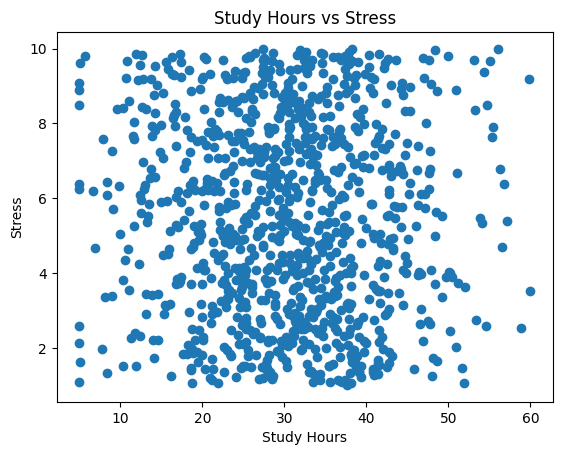

In [ ]:
plt.scatter(df['StudyHours'], df['Stress'])
plt.title('Study Hours vs Stress')
plt.xlabel('Study Hours')
plt.ylabel('Stress')
plt.show()

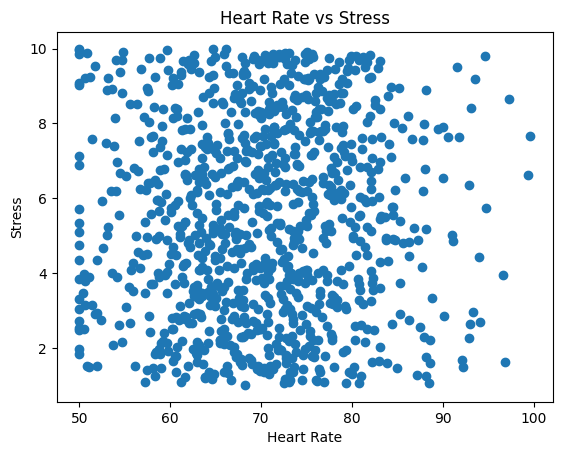

In [ ]:
plt.scatter(df['HeartRate'], df['Stress'])
plt.title('Heart Rate vs Stress')
plt.xlabel('Heart Rate')
plt.ylabel('Stress')
plt.show()

In [ ]:
def get_grade(stress_level):
    if stress_level >= 3 and stress_level <= 5:
        return 'Low'
    elif stress_level >= 6 and stress_level <=7:
        return 'Medium'
    else:
        return 'High'

df['Stress_Grade'] = df['Stress'].apply(get_grade)
df.head()

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members,Stress_Grade
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2,Low
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1,Low
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12,Medium
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9,Medium
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7,High


In [ ]:
df['Stress_Grade'].value_counts()

,count
Stress_Grade,
High,656
Low,228
Medium,116


In [ ]:
def study_category(x):
    if x <= 10:
        return 'Low'
    elif x <=20:
        return 'Medium'
    else:
        return 'High'

df['Study_Category']=df['StudyHours'].apply(study_category)
df.head()

,Student_ID,Age,Gender,HeartRate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,StudyHours,Project_Hours,Health_Risk_Level,Family_members,Stress_Grade,Study_Category
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate,2,Low,High
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate,1,Low,Medium
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate,12,Medium,High
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High,9,Medium,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate,7,High,Low


In [38]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
HeartRate,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Stress,0
Stress_Level_Self_Report,0
Physical_Activity,0
Sleep_Quality,0


In [40]:
df.to_csv("student_health_cleaned.csv", index=False)

In [41]:
from google.colab import files
files.download('student_health_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>